In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [2]:
df = pd.read_excel("data_dkhp.xlsx")
df

,Time,Count
0,02:59:53,1879
1,03:01:21,1868
2,03:01:36,1878
3,03:02:02,1899
4,03:03:05,1902
...,...,...
1679,08:34:40,3494
1680,08:35:58,3977
1681,08:37:19,4507
1682,08:38:33,5014


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1684 entries, 0 to 1683
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Time    1684 non-null   object
 1   Count   1684 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 26.4+ KB


In [4]:
def get_time(time_str):
    time_str = str(time_str)
    time_format = "%H:%M:%S"
    current_date = datetime.now().date()
    time_datetime = datetime.strptime(time_str, time_format)
    new_date = current_date.replace(day=19, month=5, year=2023)
    new_datetime = datetime.combine(new_date, time_datetime.time())
    return new_datetime

In [5]:
df['Time'] = df['Time'].apply(get_time)
df

,Time,Count
0,2023-05-19 02:59:53,1879
1,2023-05-19 03:01:21,1868
2,2023-05-19 03:01:36,1878
3,2023-05-19 03:02:02,1899
4,2023-05-19 03:03:05,1902
...,...,...
1679,2023-05-19 08:34:40,3494
1680,2023-05-19 08:35:58,3977
1681,2023-05-19 08:37:19,4507
1682,2023-05-19 08:38:33,5014


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1684 entries, 0 to 1683
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Time    1684 non-null   datetime64[ns]
 1   Count   1684 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 26.4 KB


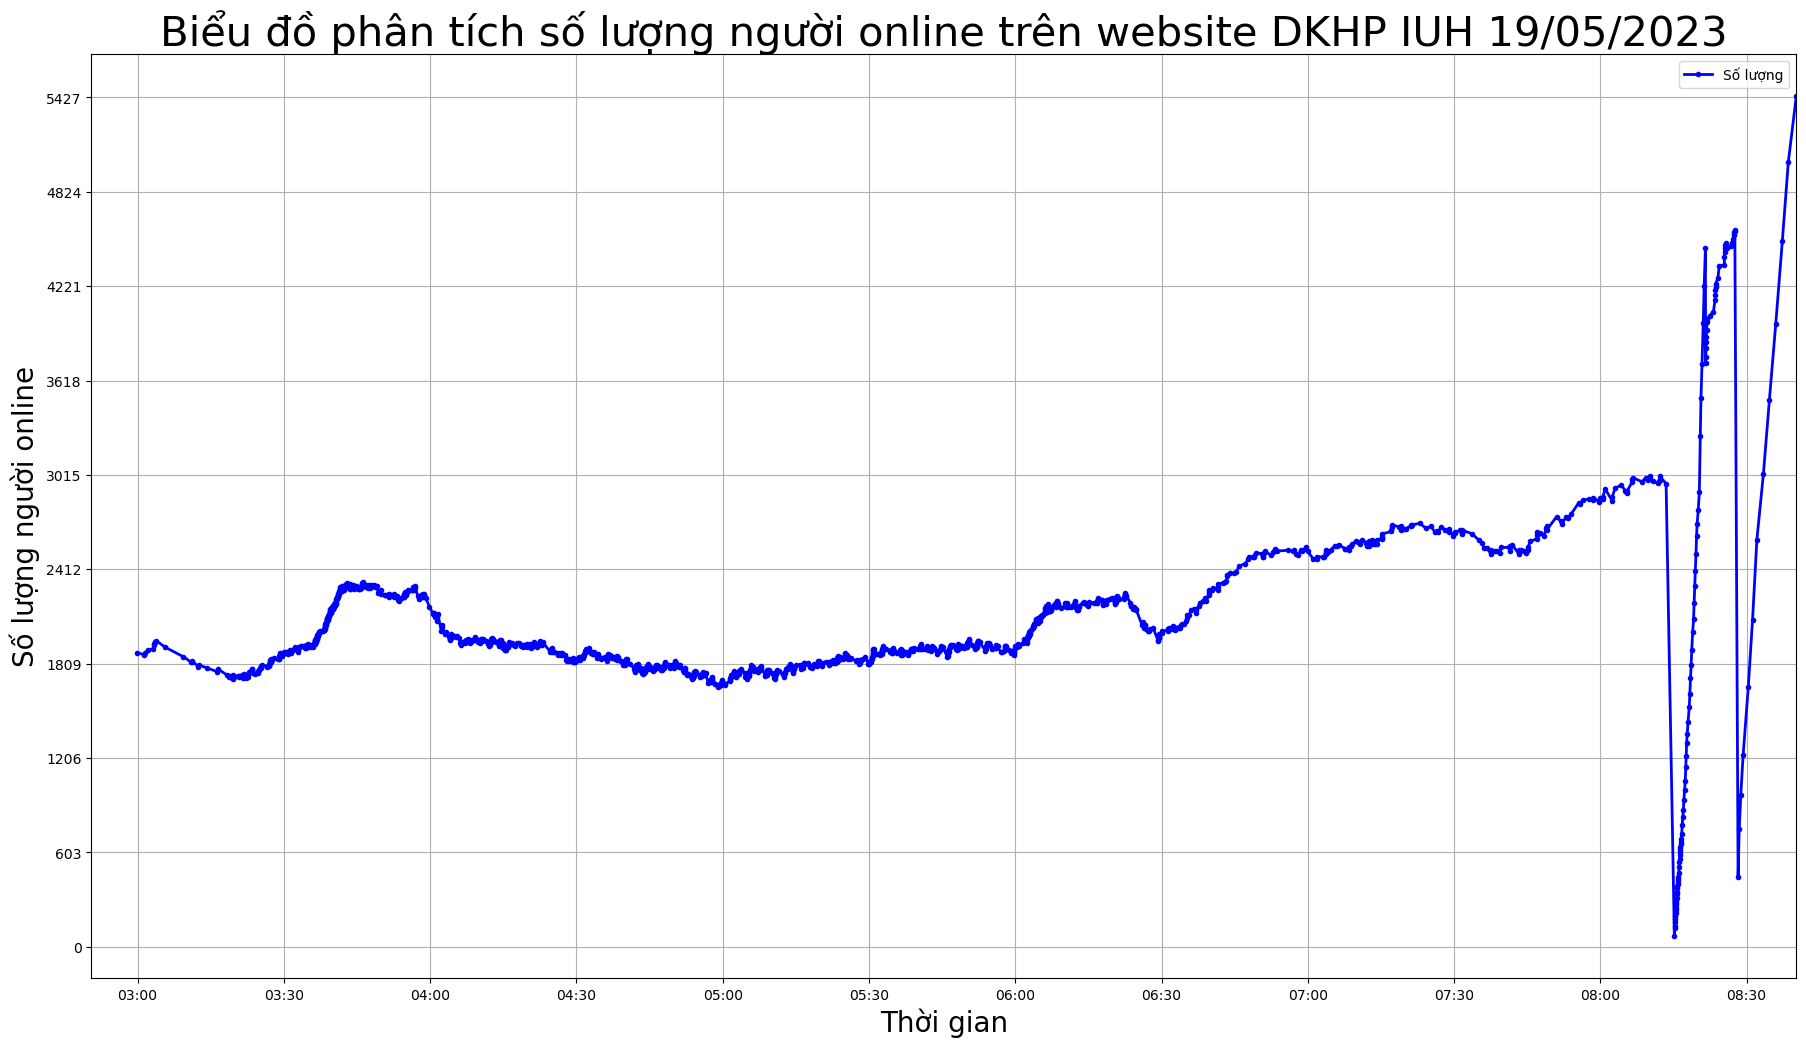

In [7]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Chuyển đổi cột 'Time' thành định dạng datetime
df['Time'] = pd.to_datetime(df['Time'])

# Vẽ biểu đồ
plt.figure(figsize=(22, 12))  # Kích thước của biểu đồ

plt.plot(df['Time'], df['Count'], color='blue', linestyle='-', linewidth=2, marker='o', markersize=3, label='Số lượng')  # Vẽ đường biểu đồ

plt.grid(True)  # Hiển thị lưới

# Định dạng trục x
ax = plt.gca()  # Lấy trục hiện tại
ax.set_xlim(df['Time'].iloc[0].replace(hour=2, minute=50, second=30), df['Time'].iloc[-1])
ax.xaxis.set_major_locator(mdates.MinuteLocator(interval=30))  # Định vị các điểm trên trục x cách nhau 30 phút
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))  # Định dạng lại nhãn trục x thành giờ:phút (2:00, 2:30, ...)

# Định dạng trục y
num_ticks = 10  # Số lượng giá trị trên trục y
max_count = df['Count'].max()  # Giá trị lớn nhất trong cột 'Count'
step = max_count // (num_ticks - 1)  # Bước tăng giá trị
y_ticks = [i * step for i in range(num_ticks)]  # Danh sách các giá trị trục y
plt.yticks(y_ticks)  # Đặt giá trị trục y

plt.ylabel('Số lượng người online', fontsize=20)  # Nhãn trục y
plt.xlabel('Thời gian', fontsize=20)  # Nhãn trục x

# Tiêu đề biểu đồ
plt.title('Biểu đồ phân tích số lượng người online trên website DKHP IUH 19/05/2023', fontsize=30)  # Tiêu đề biểu đồ

# Chú thích
plt.legend(['Số lượng'])  # Chú thích cho đường biểu đồ

plt.show()  # Hiển thị biểu đồ
